In [1]:
# Maximum population growth rate ($r_m$) calculations

In [2]:
###### Population growth rate (r_m) calculations #######

rm(list=ls())
graphics.off()

require('tidyverse')
require('patchwork')
require('cowplot')

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: patchwork

Loading required package: cowplot


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




Here we first calculate the underlying trait TPCs calculate $r_m$, and then mass-correct it.  

In [3]:
# Create argument containing target species
spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
        species == 'Halyomorpha halys' ~ '2', 
        species == 'Aedes aegypti' ~ '3',
        species == 'Anthonomus grandis' ~ '4',
        species == 'Paracoccus marginatus' ~ '5',
        species == 'Acyrthosiphon pisum' ~ '6',
        species == 'Aphis gossypii' ~ '7',
        species == 'Bemisia tabaci' ~ '8',
        species == 'Tetraneura nigriabdominalis' ~ '9',
        species == 'Stethorus punctillum' ~ '10',
        species == 'Tetranychus mcdanieli' ~ '11',
        species == 'Muscidifurax zaraptor' ~ '12',
        species == 'Aphis nasturtii' ~ '13',
        species == 'Rhopalosiphum maidis' ~ '14',
        species == 'Thrips hawaiiensis' ~ '15',
        species == 'Helicoverpa armigera' ~ '16')"

In [4]:
# Read in the trait data
alpha <- as_tibble(read.csv('../data/AlphaPredictions.csv')) %>% 
  select(species, temp, alpha, alphaLwr, alphaUpr, curve_ID) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)

#alpha %>% distinct(species, curve_ID) %>% print(n=50)
alpha

species,temp,alpha,alphaLwr,alphaUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.00000000,1929.329,2809.379,1327.629,1
Anoplophora glabripennis,0.04504505,1922.721,2796.720,1324.142,1
Anoplophora glabripennis,0.09009009,1916.138,2784.122,1320.665,1
Anoplophora glabripennis,0.13513514,1909.580,2771.585,1317.199,1
Anoplophora glabripennis,0.18018018,1903.046,2759.365,1313.742,1
Anoplophora glabripennis,0.22522523,1896.537,2747.220,1310.296,1
Anoplophora glabripennis,0.27027027,1890.052,2735.133,1306.860,1
Anoplophora glabripennis,0.31531532,1883.592,2723.102,1303.434,1
Anoplophora glabripennis,0.36036036,1877.156,2711.129,1300.018,1


In [5]:
zj  <- as_tibble(read.csv('../data/zjPredictions.csv'))  %>% 
  select(species, temp, zj, zjLwr, zjUpr, curve_ID) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Acyrthosiphon pisum' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)

#zj %>% distinct(species, curve_ID) %>% print(n=50)

head(zj)

species,temp,zj,zjLwr,zjUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.00000000,0.01945223,0.07275534,0.009129966,1
Anoplophora glabripennis,0.04504505,0.01929008,0.07181438,0.009073974,1
Anoplophora glabripennis,0.09009009,0.01912934,0.07085772,0.009018344,1
Anoplophora glabripennis,0.13513514,0.01896998,0.06990686,0.008963074,1
Anoplophora glabripennis,0.18018018,0.01881200,0.06896908,0.008908160,1
Anoplophora glabripennis,0.22522523,0.01865540,0.06804420,0.008853601,1


In [6]:
z  <- as_tibble(read.csv('../data/zPredictions.csv'))  %>% 
  select(species, temp, z, zLwr, zUpr, curve_ID) %>%
  mutate(temp = as.numeric(temp)) %>%
           filter(species == 'Anoplophora glabripennis' |
                    species == 'Halyomorpha halys' |
                    species == 'Aedes aegypti'|
                    species == 'Anthonomus grandis' |
                    species == 'Paracoccus marginatus' |
                    species == 'Acyrthosiphon pisum' |
                    species == 'Aphis gossypii' |
                    species == 'Bemisia tabaci' |
                    species == 'Tetraneura nigriabdominalis' |
                    species == 'Stethorus punctillum' |
                    species == 'Tetranychus mcdanieli' |
                    species == 'Muscidifurax zaraptor' |
                    species == 'Aphis nasturtii' |
                    species == 'Rhopalosiphum maidis' |
                    species == 'Thrips hawaiiensis' |
                    species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)
  
#z %>% distinct(species, curve_ID) %>% print(n=50)
         
head(z)

species,temp,z,zLwr,zUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.00000000,0.1134038,1.2155217,0.04742932,1
Anoplophora glabripennis,0.04504505,0.1114940,1.1670197,0.04692229,1
Anoplophora glabripennis,0.09009009,0.1096178,1.1204743,0.04642110,1
Anoplophora glabripennis,0.13513514,0.1077748,1.0758060,0.04592569,1
Anoplophora glabripennis,0.18018018,0.1059643,1.0329387,0.04543599,1
Anoplophora glabripennis,0.22522523,0.1041858,0.9917991,0.04492886,1


In [7]:
bmax <- as_tibble(read.csv('../data/BetaPredictions.csv'))  %>% 
  select(species, temp, bmax, bmaxLwr, bmaxUpr, curve_ID) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Acyrthosiphon pisum' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)

#bmax %>% distinct(species, curve_ID) %>% print(n=50)


head(bmax)

species,temp,bmax,bmaxLwr,bmaxUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,0.00000000,0.05883476,0.01394135,0.1144942,1
Anoplophora glabripennis,0.04504505,0.05918183,0.01406028,0.1150112,1
Anoplophora glabripennis,0.09009009,0.05953083,0.01418018,0.1155303,1
Anoplophora glabripennis,0.13513514,0.05988177,0.01430107,0.1160516,1
Anoplophora glabripennis,0.18018018,0.06023467,0.01442295,0.1165750,1
Anoplophora glabripennis,0.22522523,0.06058952,0.01454583,0.1171006,1


In [8]:
df1 <- inner_join(alpha,bmax)

df2 <- inner_join(z, zj)

df <-  inner_join(df1, df2)

df <- df %>% mutate(kappa = 0.01)

Joining, by = c("species", "temp", "curve_ID")
Joining, by = c("species", "temp", "curve_ID")
Joining, by = c("species", "temp", "curve_ID")


## Calculate $r_m$ TPCs

In [9]:
# Define parameters

zj    <- df$zj
alpha <- df$alpha
z     <- df$z
bmax  <- df$bmax
k     <- df$kappa

# Calculate rmax
df <- df %>% mutate(rm_opt = (((k+z)*((log(bmax/(k+z)))-(alpha*zj)))/(alpha*(k+z)+1)))

# lower
zj_lwr    <- df$zjLwr
alpha_lwr <- df$alphaLwr
z_lwr     <- df$zLwr
bmax_lwr  <- df$bmaxLwr
k         <- df$kappa

df <- df %>% mutate(rm_optLwr = (((k+z_lwr)*((log(bmax_lwr/(k+z_lwr)))-(alpha_lwr*zj_lwr)))/(alpha_lwr*(k+z_lwr)+1)))

# upper 
zj_upr    <- df$zjUpr
alpha_upr <- df$alphaUpr
z_upr     <- df$zUpr
bmax_upr  <- df$bmaxUpr
k         <- df$kappa

df <- df %>% mutate(rm_optUpr = (((k+z_upr)*((log(bmax_upr/(k+z_upr)))-(alpha_upr*zj_upr)))/(alpha_upr*(k+z_upr)+1)))

write_csv(df, '../results/r_mCalcs.csv')

In [10]:
bodyMass <- as_tibble(read.csv("../data/sizeMeans.csv")) %>%
            rename(species = interactor1, mass = avg, mass_sd = sd) %>%
            mutate(curve_ID = eval(parse(text=spps))) %>%
            filter(curve_ID != 'NA') %>% arrange(curve_ID)

head(bodyMass)


bodyMass <- bodyMass %>% select(species, mass, curve_ID) 

df <- inner_join(df, bodyMass)

write_csv(df, "../results/rm_optSizeScaling.csv")


species,mass,mass_sd,curve_ID
<chr>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,159.8000000,NA,1
Stethorus punctillum,0.4800000,0.0424264069,10
Tetranychus mcdanieli,0.0243000,0.0002828427,11
Muscidifurax zaraptor,0.8950000,0.0932737905,12
Aphis nasturtii,0.8673000,0.3252394195,13
Rhopalosiphum maidis,0.2995714,0.1664730780,14


Joining, by = c("species", "curve_ID")


In [11]:
# truncate data for plotting 

df <- df %>%
  mutate_at(vars(c(rm_opt)), 
            ~ifelse(rm_opt < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optLwr)), 
            ~ifelse(rm_optLwr < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optUpr)), 
            ~ifelse(rm_optUpr < -0.001, -0.001, .)) %>%
  filter(rm_opt > -0.001)

In [12]:
head(df)

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,zLwr,zUpr,zj,zjLwr,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,9.504505,958.3948,1151.638,776.4777,1,0.1952417,0.08455109,0.2823327,0.007869930,0.008928216,0.006793264,0.003538013,0.005670321,0.002556520,0.01,-0.0009855468,-0.001,0.001001199,159.8
Anoplophora glabripennis,9.549550,955.3291,1146.942,774.5728,1,0.1963171,0.08528899,0.2834664,0.007834876,0.008879565,0.006795527,0.003510675,0.005607148,0.002540884,0.01,-0.0009445085,-0.001,0.001028496,159.8
Anoplophora glabripennis,9.594595,952.2741,1142.266,772.6732,1,0.1973980,0.08603309,0.2846043,0.007800724,0.008832366,0.006785853,0.003483562,0.005544719,0.002525350,0.01,-0.0009036855,-0.001,0.001056529,159.8
Anoplophora glabripennis,9.639640,949.2299,1137.611,770.7789,1,0.1984846,0.08678345,0.2857464,0.007767460,0.008790560,0.006786724,0.003456672,0.005483024,0.002509916,0.01,-0.0008630756,-0.001,0.001083791,159.8
Anoplophora glabripennis,9.684685,946.1964,1132.977,768.8898,1,0.1995768,0.08754011,0.2868927,0.007735071,0.008754780,0.006780506,0.003430002,0.005422055,0.002494521,0.01,-0.0008226763,-0.001,0.001111525,159.8
Anoplophora glabripennis,9.729730,943.1736,1128.356,767.0060,1,0.2006746,0.08830312,0.2880432,0.007703542,0.008713271,0.006774378,0.003403551,0.005361803,0.002479181,0.01,-0.0007824853,-0.001,0.001139230,159.8


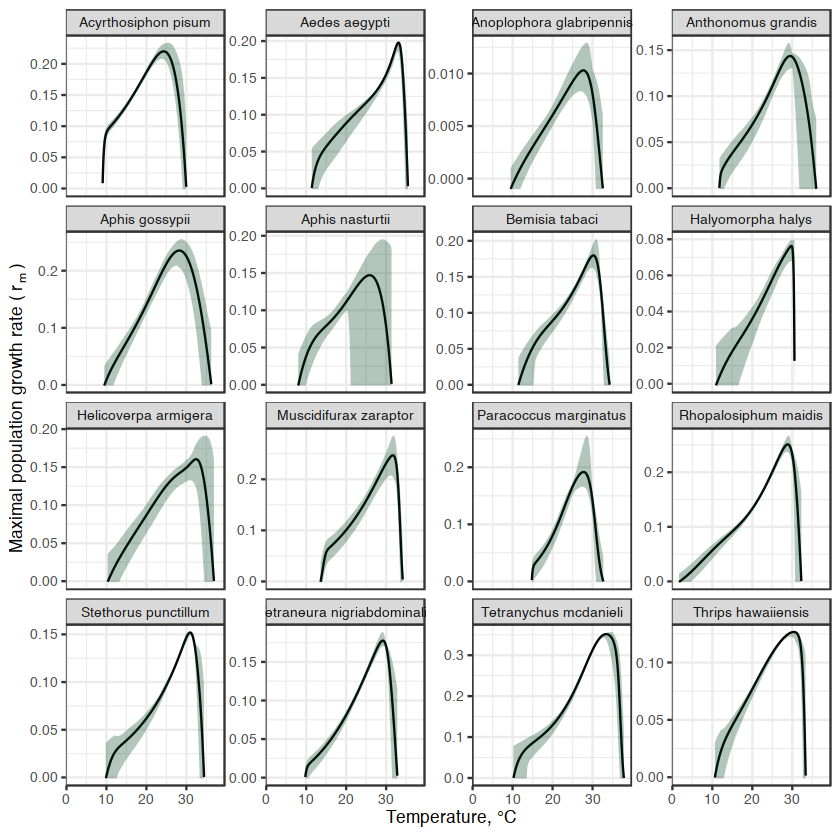

In [13]:
# plot r_m TPCs

rmPlot <- ggplot()+
  geom_line(aes(temp, rm_opt), df)+
  facet_wrap(~species, ncol = 4, scales = "free_y")+
  scale_y_continuous(expression(plain(paste(" Maximal population growth rate ("~italic(r[m])~")"))))+
  theme_bw()+
  geom_ribbon(aes(temp, ymin=rm_optLwr, ymax=rm_optUpr), df, fill="#004225",alpha=0.3)+
  theme(text = element_text(size=10, family='Times'))+
  theme(strip.text = element_text(face = "italic"))+
  labs(x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

rmPlot

In [14]:
save_plot(rmPlot, file="../results/SI/rmTPCs.pdf", 
          base_height=15, base_width = 18, base_asp = 1, units="cm")